# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
src_dir = os.path.join(os.getcwd(), '..')
sys.path.append(src_dir)

In [3]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [83]:
from src.data.make_dataset import load_interim_train
from src.visualization.visualize import plot_boxplots
from src.visualization.visualize import plot_correlation_matrix
from src.visualization.visualize import plot_crosstab

# Load data

In [5]:
df = load_interim_train()
df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,GroupSize,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,2,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,1,F,S


# Correlation analysis

## Numerical data

Plotting correlation matrix

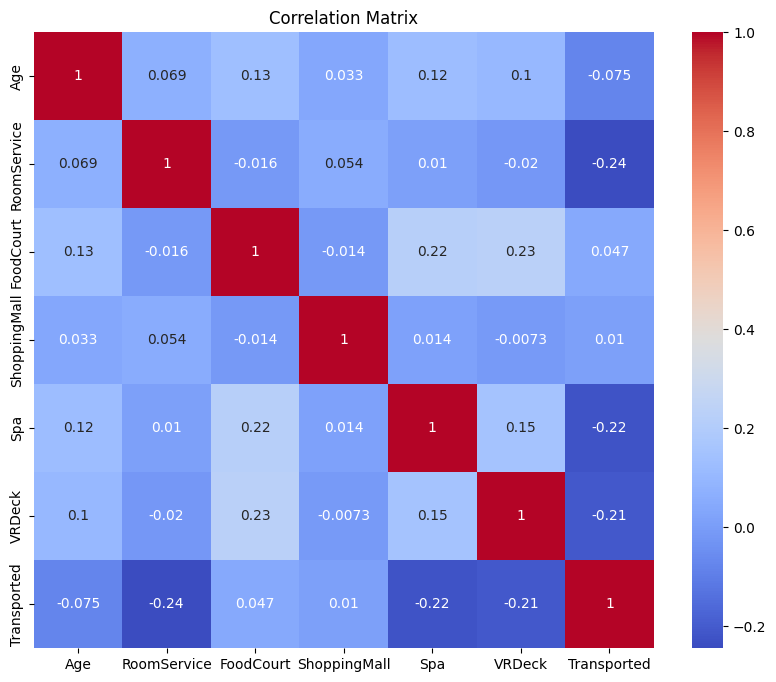

In [101]:
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plot_correlation_matrix(df, numerical_features, 'Transported')

Purposefuly omitted `GroupNumber` and `GroupSize` since they are categorical (`GroupNumber`) and ordinal (`GroupSize`). 

Looking at heatmap looks like `RoomService`, `Spa` and `VRDeck` has meaningful influence on `Transported` target.

Now let's look at categorical features.

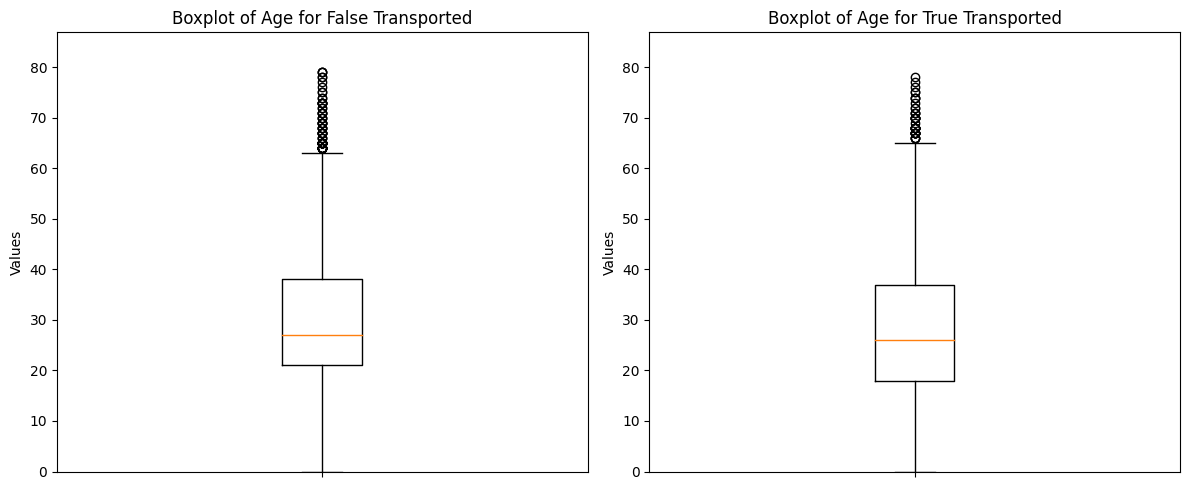

In [20]:
plot_boxplots(df, ['Age'], 'Transported')

Looks like `Age` is not that correlated to target feature.

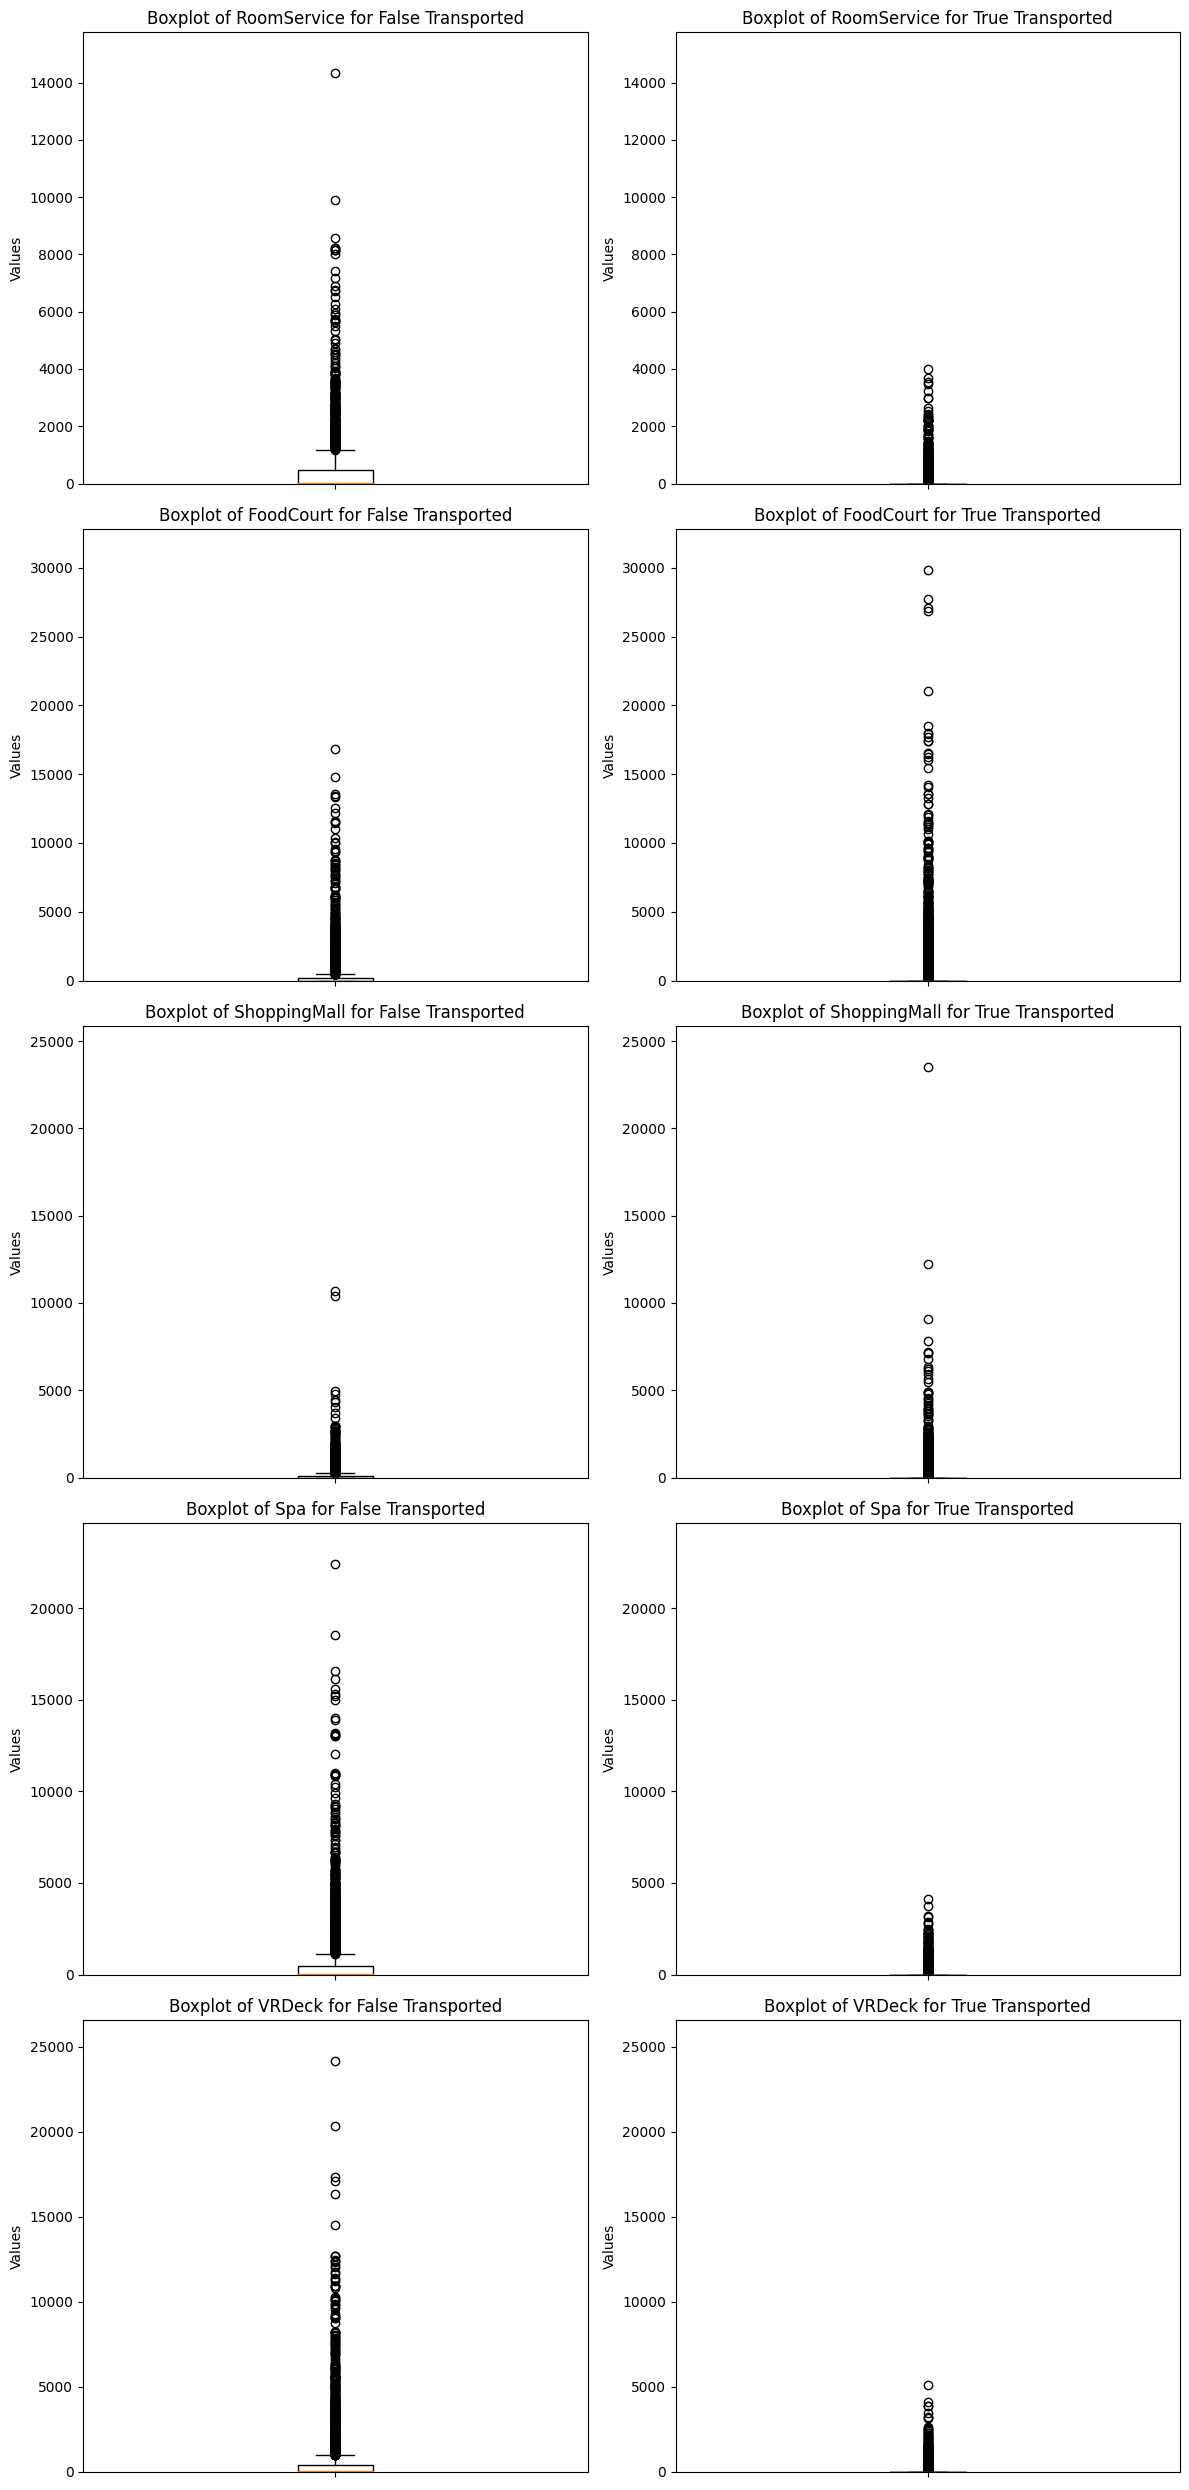

In [21]:
plot_boxplots(df, ['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck'], 'Transported')

There is stronger correlation between target feature and `RoomService`, `Spa` and `VRDeck`. Looks like people that spent more on those were less likely to be transported.

## Categorical data

Plotting crosstabs for different categorical features vs target feature.

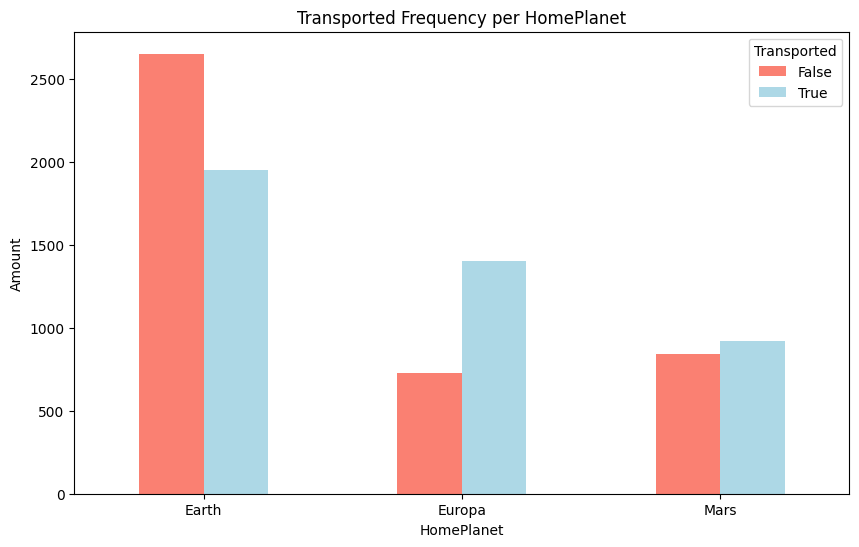

In [93]:
categorical_data = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
plot_crosstab(df, categorical_data[0], "Transported")

Looking at bar plot looks like if your `HomePlanet` is `Earth` you are less likely to be transported. If your `HomePlanet` is `Europa`, then on the contrary, you are more likely to be transported. And if your `HomePlanet` is `Mars`, it is just as likely to be transported or not.

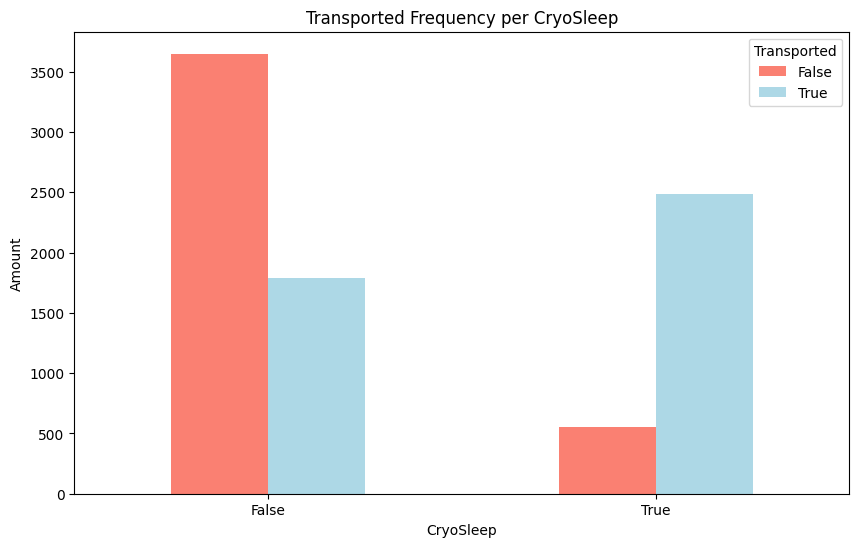

In [94]:
plot_crosstab(df, categorical_data[1], "Transported")

Looks like if you weren't in `CryoSleep` then you are more likely to not be transported. And if you were in `CryoSleep` then you are more likely to be transported.

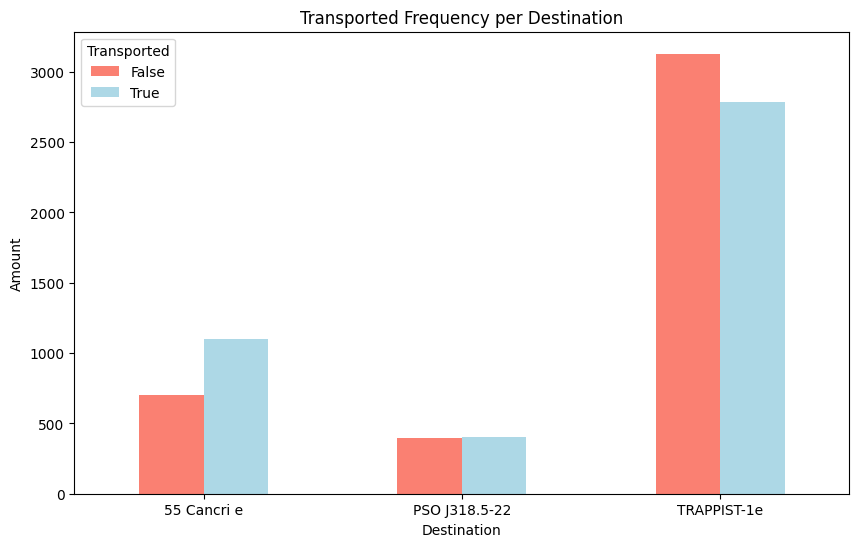

In [95]:
plot_crosstab(df, categorical_data[2], "Transported")

Here it looks like `Destination` doesn't matter that much. It will not the best predictor for `Transported`.

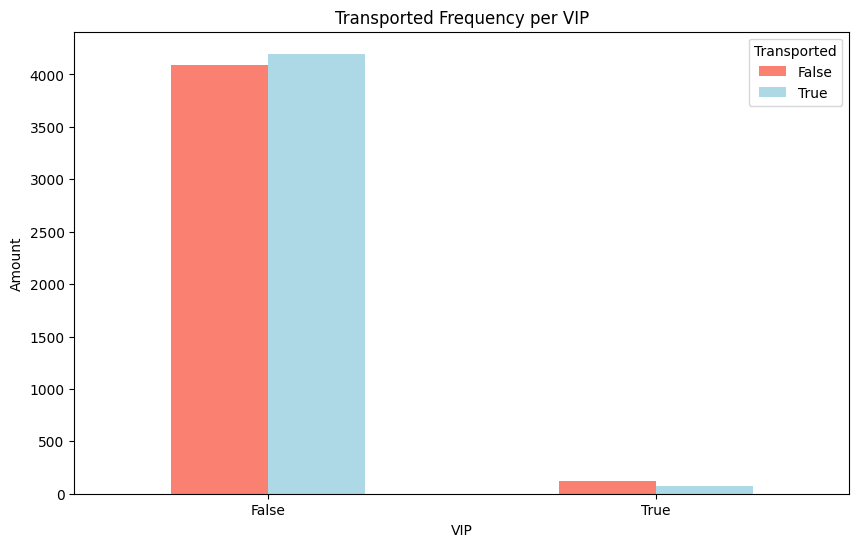

In [96]:
plot_crosstab(df, categorical_data[3], "Transported")

Similarly to `Destination` - `VIP` doesn't matter that much. It will not be the best predictor for `Transported`.

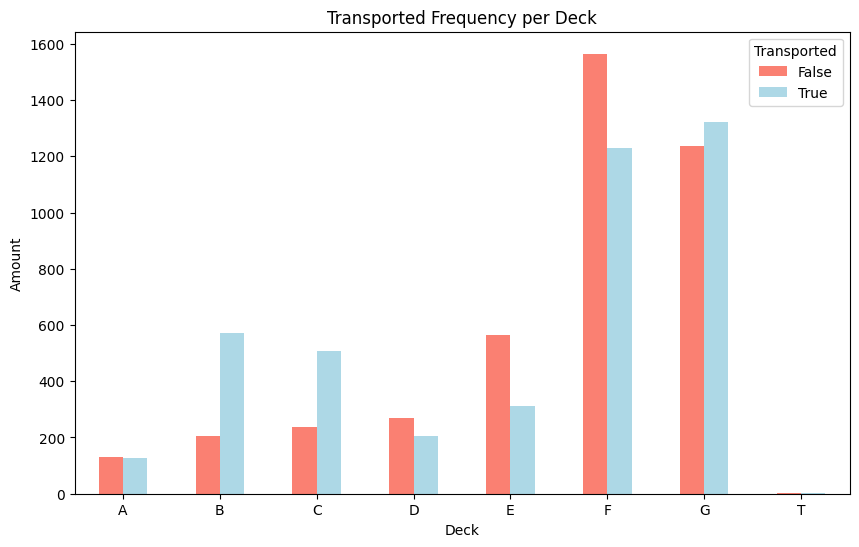

In [97]:
plot_crosstab(df, categorical_data[4], "Transported")

People in `Deck` - `B` and `C` are much more likely to be transported then people in other decks. On the opposite side, people in `Deck` - `E` were less likely to be transported.

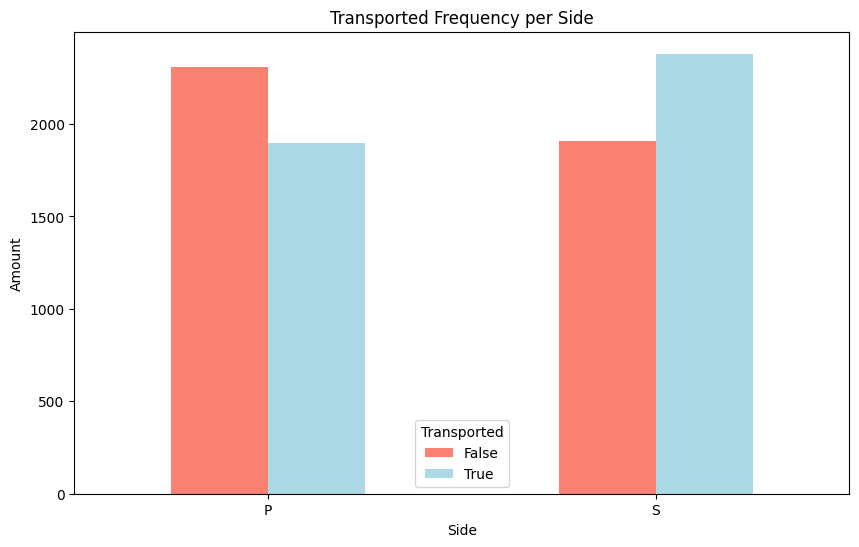

In [98]:
plot_crosstab(df, categorical_data[5], "Transported")

Here it looks like `Side` doesn't matter that much. It probably will not be the best predictor for `Transported`.

### Feature correlation

Correlation between every numerical feature.

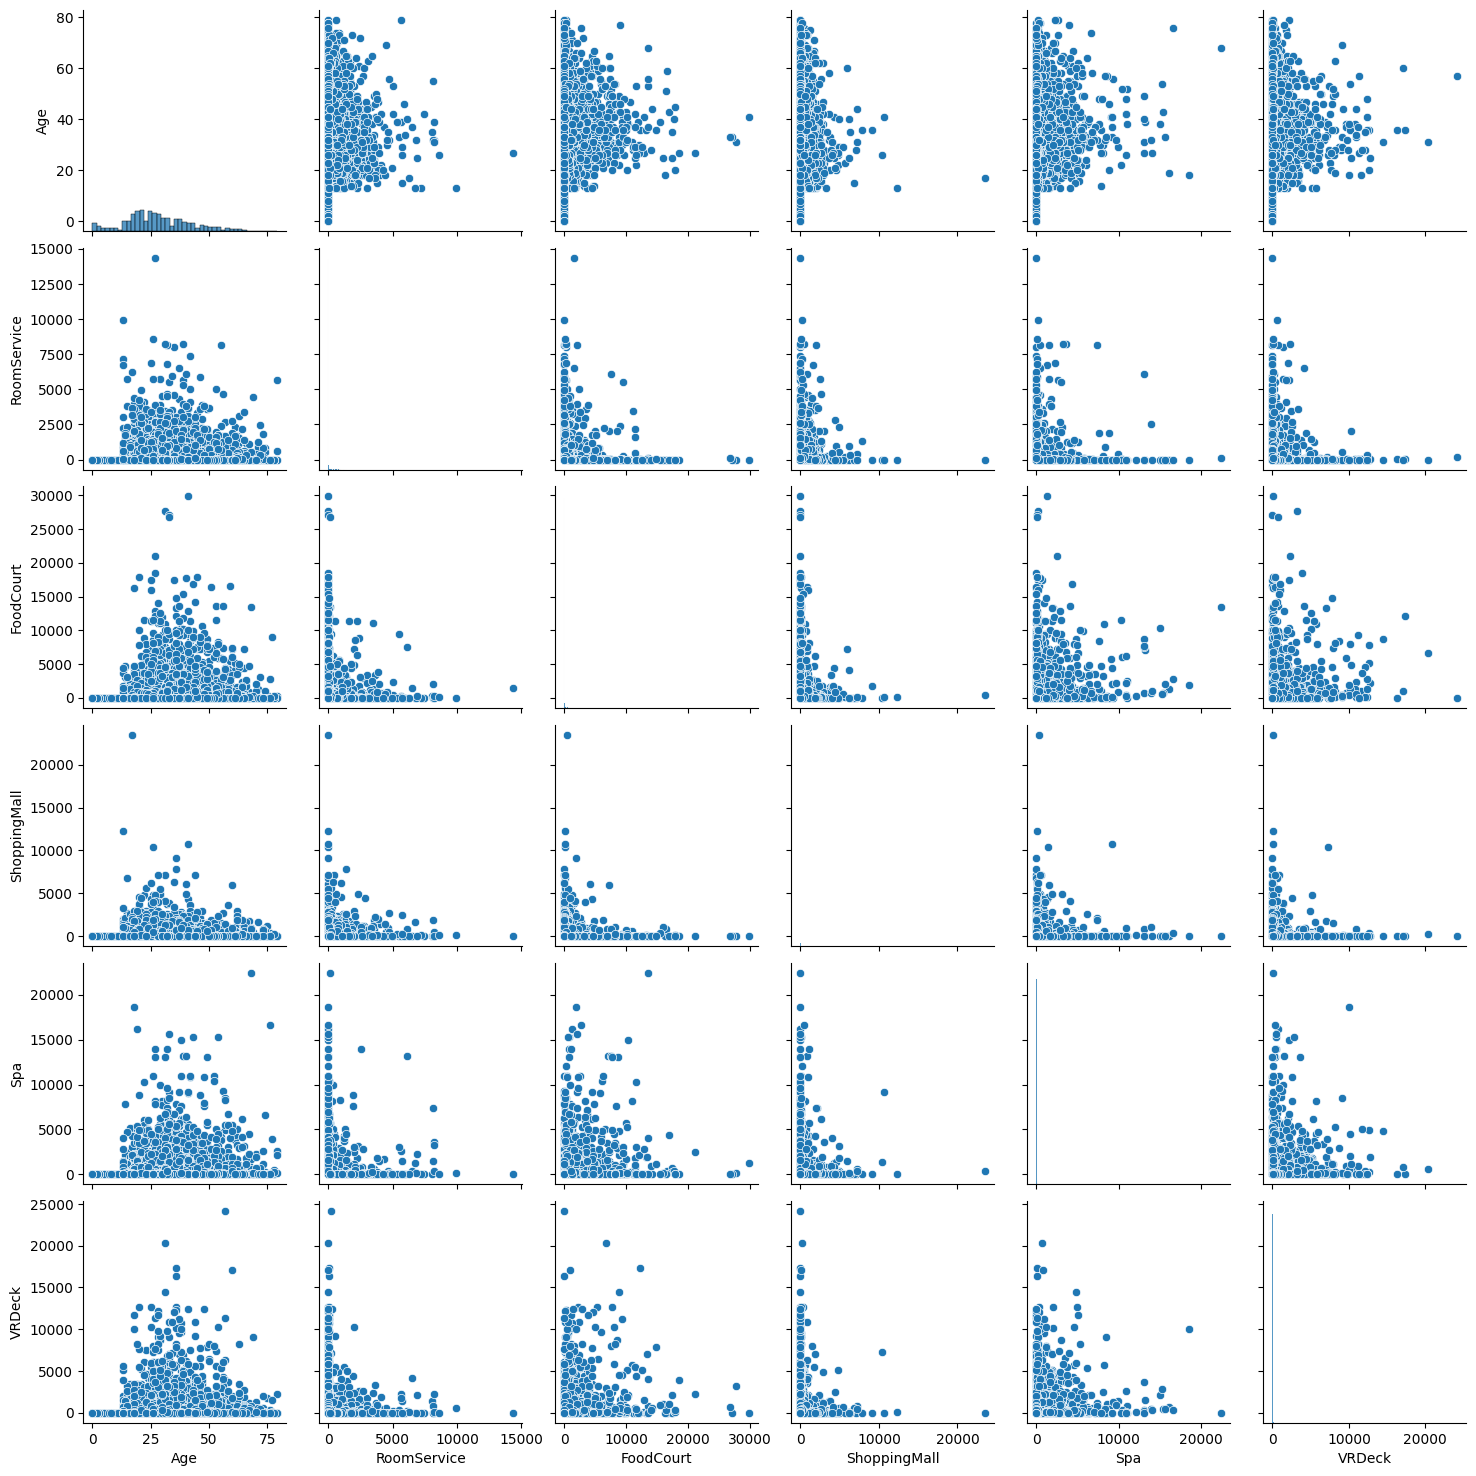

In [102]:
sns.pairplot(df[numerical_features])
plt.show()

Couple noted examples:

* Older people tended to spend less on `VRDeck` and more on `Spa`.
* People under age of around 18 didn't spend on anything, probably since they couldn't and parents had to spend for them
* `ShoppingMall` was more popular among younger and middle aged people